# Práctica 11: Algunos Métodos numéricos con MATLAB®

Los métodos numéricos son las herramientas matemáticas que permiten resolver problemas de ingeniería usando operaciones básicas que permiten aproximar soluciones a planteamientos de cálculo integral y diferencial. Los métodos numéricos como procedimientos matemáticos formales se ven ampliamente favorecidos con las herramientas computacionales como lo son los lenguajes de programación y por supuesto, ambientes especializados como MATLAB®.

En esta práctica, haremos uso de las funciones incluidas en MATLAB® para la aplicación de métodos numéricos a conjuntos de datos. Exploraremos las técnicas de interpolación y regresión numérica en forma introductoria.

## Interpolación lineal

La interpolación lineal es una técnica que permite determinar valores numéricos de variables experimentales que no se encuentran en un conjunto de mediciones experimentales. Cuando se realiza un experimento, es imposible tomar mediciones de cada uno de los pares ordenados o puntos de interés ({cite:t}`Moore2013`). Lo anterior se ejemplifica en la siguiente figura:






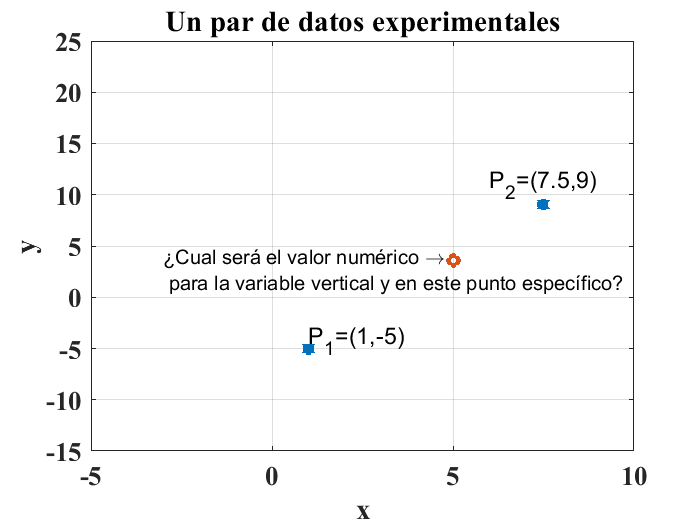

In [1]:
clear
close all
clc
x=[1,7.5];
y=[-5,9];
plot(x,y,"*","LineWidth",3)
title("Un par de datos experimentales")
xlabel("x")
ylabel("y")
axis([-5,10,-15,25])
txt = "P_1=(1,-5)";
text(1,-4.15,txt,'FontSize',14)

txt = "P_2=(7.5,9)";
text(6,11,txt,'FontSize',14)
hold on
plot(5,interp1(x,y,5),"o","LineWidth",3)
grid
txt = '¿Cual será el valor numérico \rightarrow\newline para la variable vertical y en este punto específico? ';
text(-3,2.8,txt,'FontSize',12)
set(gca,'fontsize',16);
set(gca,'fontname','Times New Roman','FontWeight','Bold');

El método más común para encontrar punto que falta, que se ilustra en la figura anterior es el conocido como la interpolación lineal. Esta técnica consiste en asumir que el comportamiento de los datos es lineal, es decir, se asume que los datos que se midieron de forma experimental describen un comportamiento que se puede modelar usando una línea recta. Si se conoce la ecuación de dicha recta, es posible determinar el valor de cualquier valor de la variable $y$, a partir de cualquier valor deseado o propuesto para la variable $x$. Entre más cercanos estén entre ellos los puntos, más precisa será la aproximación ({cite:t}`Moore2013`, {cite:t}`chapra2006metodos`).

Por ejemplo, si se cuenta con un par de puntos, obtenidos a partir de los pares ordenados de datos que se ilustran en la gráfica anterior, $P_1=(1,-5)$ y $P_2=(7.5,9)$, el valor numérico de la coordenada $y$ para $x=5$ se obtiene usando el comando `interp1(P1,P2,5)` como se ilustra a continuación:

In [2]:
interp1([1,7.5],[-5,9],5)

ans = 3.6154

Esto significa que el punto obtenido con interpolación corresponde a las coordenadas $x=5$ y $y=3.6154$, es decir $P_{interpolado}=(5,3.6154)$. De forma gráfica, el valor calculado para la coordenada $y$ se usa para construir el punto interpolado deseado, como se muestra en la siguiente figura:

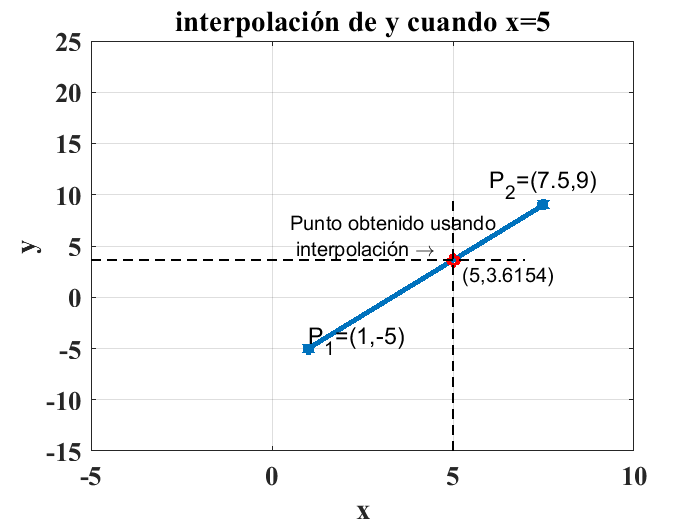

In [3]:
clear
close all
clc
x=[1,7.5];
y=[-5,9];
plot(x,y,"*-","LineWidth",3)
title("interpolación de y cuando x=5")
xlabel("x")
ylabel("y")
axis([-5,10,-15,25])
txt = "P_1=(1,-5)";
text(1,-4.15,txt,'FontSize',14)

txt = "P_2=(7.5,9)";
text(6,11,txt,'FontSize',14)
hold on
plot(5,interp1(x,y,5),"r-o","LineWidth",3)
grid
x1 = [-5 7];
y1 = [3.6154 3.6154];
x2 = [5 5];
y2 = [-15 10];
plot(x1,y1,"k--","LineWidth",1)
plot(x2,y2,"k--","LineWidth",1)


txt = 'Punto obtenido usando \newline interpolación \rightarrow \newline                               (5,3.6154)';
text(0.5,4.8,txt,'FontSize',12)
set(gca,'fontsize',16);
set(gca,'fontname','Times New Roman','FontWeight','Bold');

Es posible interpolar múltiples valores de la variable independiente con un solo uso de la istrucción `iterp1()`, por ejemplo para los pares ordenados de la siguiente tabla:


  |   $x$   |   $y$   |  
  | :------ | ------: | 
  |  0.0  |  22.430 | 
  |  1.0  |  19.398 | 
  |  2.0  |  11.341 |  
  |  3.0  |  8.422 |  
  |  4.0  |  5.215 |  
  |  5.0  |  0.434 |  
 
Si se desea interpolar un conjunto de datos en la variable independiente $x$ con una resolución, es decir, con un incremento diferente se usan las instrucciones siguientes:

In [4]:
clear 
close all
clc

x=[0:5]; %vector x original
y=[22.430,19.398,11.342,8.422,5.215,0.434]; % vector y original
% Proceso de interpolación de valores de y para un conjunto de valores de x con
% mayor resolución
x_nuevo=[0:0.5:5];
y_nuevo=interp1(x,y,x_nuevo)

y_nuevo = 1×11 double
   22.4300   20.9140   19.3980   15.3700   11.3420    9.8820    8.4220    6.8185    5.2150    2.8245    0.4340

La gráfica de los datos originales en contraste con los datos interpolados se obtiene usando las instrucciones:

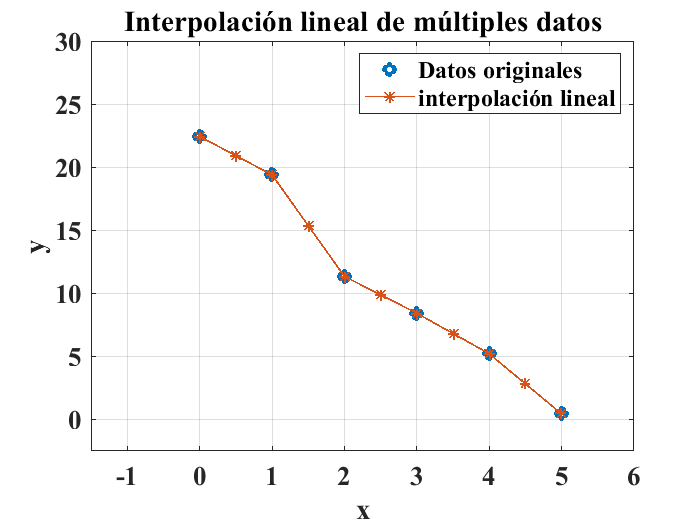

In [5]:
figure
plot(x,y,"o","LineWidth",3)
axis([-1.5,6,-2.5,30])
title("Interpolación lineal de múltiples datos")
grid
hold on
plot(x_nuevo,y_nuevo,"*-","LineWidth",1)
xlabel("x")
ylabel("y")
legend("Datos originales","interpolación lineal")
set(gca,'fontsize',16);
set(gca,'fontname','Times New Roman','FontWeight','Bold');

## Iterpolación con aproximación no lineal

Una forma de interpolar datos que no se encuentran en el conjunto de mediciones experimentales, de manera más suave que la que se realiza por medio de la interpolación usando lineas rectas es la interpolación no lineal. Usando esta técnica de interpolación se consigue un comportamiento más suave de las aproximaciones. Para hacer uso de esta técnica en MATLAB®, se especifica el tipo de interpolación añadiendo una cadena de caracteres con la especificación deseada para la interpolación; `iterp1(x,y,'spline')`. Lo anterior queda ejemplificado con las siguientes líneas de código que retoman el primer caso ejmplo para interpolación lineal de los puntos :


In [6]:
interp1([1,7.5],[-5,9],5,'spline')

ans = 3.6154

De la misma manera que se hizo para el caso de la interpolación lineal, se puede hacer uso de la interpolación no lienal para la aproximación de un conjunto de datos a la vez como se ilustra en la siguiente figura:

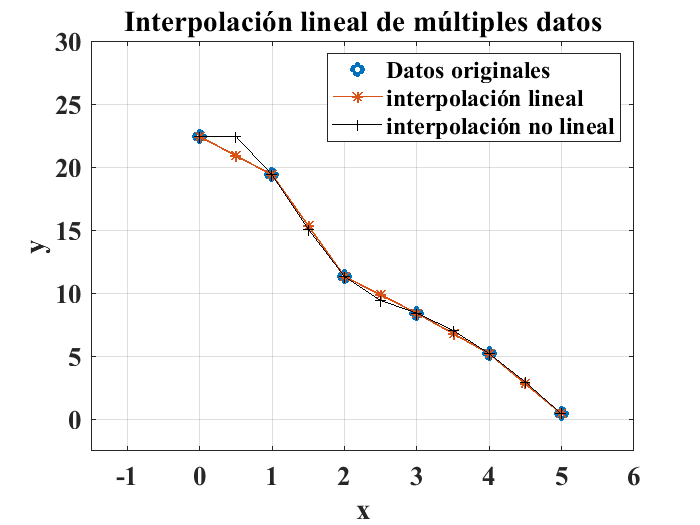

In [7]:
y_nolineal=interp1(x,y,x_nuevo,'spline');
plot(x_nuevo,y_nolineal,"k+-")
legend("Datos originales","interpolación lineal","interpolación no lineal")

La siguiente tabla muestra un resumen de las opciones disponibles para la interpolación de datos usando el compado `interp1()`:

```{list-table} Tabla de opciones de interpolación.
:header-rows: 1
:name: Tabla_interp
* - Comando MATLAB®  
  - Descripción 
* - ``interp1(x,y,'linear')`` 
  - Iterpolación lineal del valor de $y$ dado $x=a$ 
* - ``interp1(x,y,a,'nearest')`` 
  - Iterpolación del valor más cercano de $y$ dado $x=a$ 
* - ``interp1(x,y,a,'spline')`` 
  - Interpolación cúbica seccionada del valor de $y$ dado $x=a$ 
* - ``interp1(x,y,a,'pchip')`` 
  - Interpolación cúbica, preservando la forma de la curva original del valor de $y$ dado $x=a$
* - ``interp1(x,y,a,'cubic')``  
  - Interpolación del valor de $y$ dado $x=a$ similar a la opción 'pchip'
* - ``interp1(x,y,a,'v5cubic')``   
  - Interpolación cúbica, sin extrapolación, del valor de $y$ dado $x=a$
```

En las siguientes líneas se ejemplifica el uso de las opciones contenidas en la tabla anterior para interpolar el valor de $x=2.5$ de los datos usados para los ejemplos anteriores:

In [8]:
clear 
close all
clc

x=[0:5]; %vector x original
y=[22.430,19.398,11.342,8.422,5.215,0.434]; % vector y original
% Proceso de interpolación de valores de y para un conjunto de valores de x con
% usando las diferentes opciones para la interpolación
a=2.5;
disp("interpolación lineal")
y_nuevo=interp1(x,y,a,'linear')
disp("interpolación valor más cercano")
y_nuevo=interp1(x,y,a,'nearest')
disp("interpolación cubica")
y_nuevo=interp1(x,y,a,'spline')
disp("interpolación cúbica conservando la forma")
y_nuevo=interp1(x,y,a,'cubic')
disp("interpolación con opción pchip")
y_nuevo=interp1(x,y,a,'pchip')
disp("interlpolación con opción v5cubic")
y_nuevo=interp1(x,y,a,'v5cubic')


interpolación lineal


y_nuevo = 9.8820

interpolación valor más cercano


y_nuevo = 8.4220

interpolación cubica


y_nuevo = 9.4359

interpolación cúbica conservando la forma


y_nuevo = 9.5789

interpolación con opción pchip


y_nuevo = 9.7283

interlpolación con opción v5cubic


y_nuevo = 9.5789

Para conjuntos de valores de la variable independiente $x$ se pueden usar las mismas opciones para la interpolación de puntos:

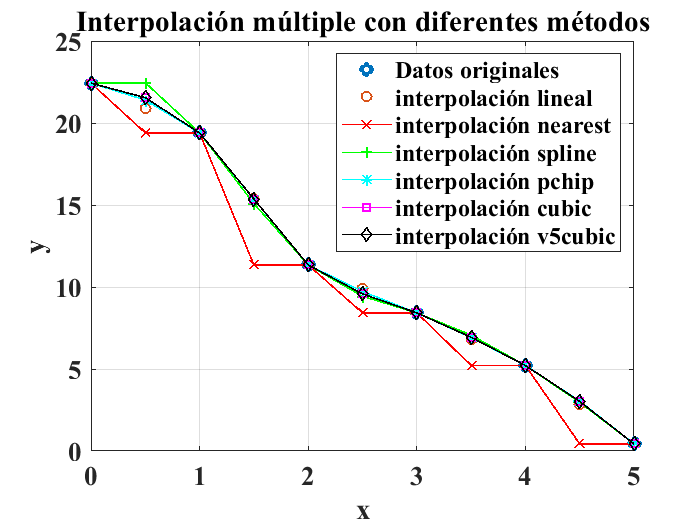

In [9]:
clear 
close all
clc

x=[0:5]; %vector x original
y=[22.430,19.398,11.342,8.422,5.215,0.434]; % vector y original
% Proceso de interpolación de valores de y para un conjunto de valores de x con
% mayor resolución
x_nuevo=[0:0.5:5];
y_nuevo_lineal=interp1(x,y,x_nuevo,'linear');
y_nuevo_nearest=interp1(x,y,x_nuevo,'nearest');
y_nuevo_spline=interp1(x,y,x_nuevo,'spline');
y_nuevo_pchip=interp1(x,y,x_nuevo,'pchip');
y_nuevo_cubic=interp1(x,y,x_nuevo,'cubic');
y_nuevo_v5cubic=interp1(x,y,x_nuevo,'v5cubic');

figure
plot(x,y,"o","LineWidth",3)
hold on 
plot(x_nuevo,y_nuevo_lineal,"o","LineWidth",1)
plot(x_nuevo,y_nuevo_nearest,"r-x","LineWidth",1)
plot(x_nuevo,y_nuevo_spline,"g-+","LineWidth",1)
plot(x_nuevo,y_nuevo_pchip,"c-*","LineWidth",1)
plot(x_nuevo,y_nuevo_cubic,"m-s","LineWidth",1)
plot(x_nuevo,y_nuevo_v5cubic,"k-d","LineWidth",1)
title("Interpolación múltiple con diferentes métodos")
xlabel("x")
ylabel("y")
legend("Datos originales","interpolación lineal","interpolación nearest",...
"interpolación spline","interpolación pchip","interpolación cubic",...
"interpolación v5cubic")
grid
set(gca,'fontsize',16);
set(gca,'fontname','Times New Roman','FontWeight','Bold');

# Interpolación de funciones de dos variables
La interpolación tambien se puede utilizar para calcular datos no medidos cuando se tienen datos de un experimento que depende de dos variables. Por ejemplo, considérese la tabla de datos siguiente:

  |       |$x=1.5$|$x=2.0$|$x=2.5$|$x=3.0$|
  |:------|:------|:------|:------|------:|
  |$y=0.0$|  11.5 | 13.43 | 23.56 | 30.45 |
  |$y=1.0$|  22.0 | 44.67 | 54.45 | 218.74|  
  |$y=2.0$|  32.5 | 64.67 | 96.15 | 16.15 |    

  Para encontrar el valor de la variable $z$ cuando $y=1.5$ y $x=1.8$, dado que son valores que no se tienen disponibles en la tabla de mediciones, es necesario hacer una interpolación. Para hacer una interpolación en el caso de dos variables independientes, se utiliza la función nativa de MATLAB®  `interp2()` Las siguientes líneas de código muestran el proceso:

In [10]:
clear 
close all
clc
x=[1.5 2.0 2.5 3.0];
y=[0.0 1.0 2.0];
z=[11.5 13.43 23.56 30.45;
   22.0 44.67 54.45 218.74;
   32.5 64.67 96.15 16.15];
%interpolación para el valor z para los valores y=1.5 y x=1.8
z_nuevo=interp2(x,y,z,1.8,1.5)

z_nuevo = 43.7020

## Regresión básica o ajuste de curvas

La interpolación, junto con todas sus opciones permite encontrar valores numéricos de datos que no fueron adquiridos o medidos de manera experimental, sin embargo, es un proceso que es conveniente cuando se requieren solo los valores numéricos de un conjunto de datos que no se midieron de forma experimental. La regresión de datos o ajuste de curvas (curve fitting en inglés) permite encontrar un modelo, es decir, una función que describa el comportamiento del conjunto de datos experimentales por medio de una fórmula específica expresada como $y=f(x)$. A continuación se presentan las funciones básicas de regresión de datos disponibles en MATLAB®.


 ## Regresión lineal

 La función mas simple que se puede usar para modelar matemáticamente a un conjunto de datos es la recta, es decir $y=mx+b$. Por ejemplo, para los datos descritos en la siguiente tabla

  | $x$ | $y$ |
  |:----|-----:|
  |$0.0$| 15.5 |
  |$0.5$| 13.4 | 
  |$1.0$|  9.85| 
  |$1.5$|  7.34| 
  |$2.0$|  3.82|
  |$2.5$|  1.54| 

  Se puede calcular la ecuación de una recta que pase por el primer y último punto como:

$$
m=\frac{y_2-y_1}{x_2-x_1}=\frac{1.54-15.5}{2.5-0}=-5.5840
$$

dado que $y=15.5$ cuando $x=0$, la ecuación de la recta que pasa por el primer y último punto es:

$$
y=-5.5840x+15.5
$$

La gráfica siguiente muestra una comparación entre los datos originales y la recta cuya pendiente y ordenada al origen se calculó usando el primero y el útimo punto del conjunto de datos:

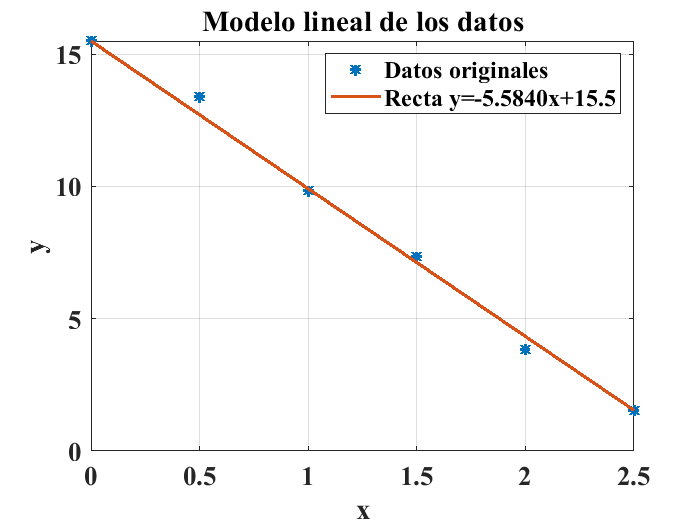

In [11]:
clear
close all
clc

x=[0:0.5:2.5];
y=[15.5,13.4,9.85,7.34,3.82,1.54];
figure
plot(x,y,"*","LineWidth",2)
hold on 
plot(x,(-5.5840*x+15.5),"LineWidth",2)
title("Modelo lineal de los datos")
xlabel("x")
ylabel("y")
legend("Datos originales","Recta y=-5.5840x+15.5")
grid
set(gca,'fontsize',16);
set(gca,'fontname','Times New Roman','FontWeight','Bold');


El método de los mínimos cuadrados permite el ajuste óptimo de la recta, es decir, proporciona el valor de la pendiente y la ordenada al origen de la recta que se propone como modelo que mejor se ajuste a los datos experimentales. La explicación del método de los mínimos cuadrados está fuera del ámbito de este curso y se puede consultar en la literatura ({cite:t}`chapra2006metodos`). MATLAB® ofrece el método de los mínimos cuadrados en la función `polyfit()`. Para el ejemplo anterior se usan las siguientes líneas de código para efectuar la regresión lineal de los datos propuestos y se comparan con la primera aproximación que se mostró en la gráfica anterior, primero se muestra el cálculo de la ecuación del de la recta que minimiza la diferencia entre los datos calculados con el modelo y los datos experimentales:

In [12]:
clear
close all
x=[0:0.5:2.5];
y=[15.5,13.4,9.85,7.34,3.82,1.54];
polyfit(x,y,1)

ans = 1×2 double
   -5.7743   15.7929

La ecuación de la recta óptima que une a los puntos es entonces:
$$
y=-5.7743x+15.7929
$$
nótese que la estructura de la instrucción `polyfit()` incluye un número 1 como argumento para especificar que se usará un polinomio de primer grado o línea recta para crear el modelo de los datos. A continuación se muestra la comparación de la regresión calculada con la primera recta propuesta:

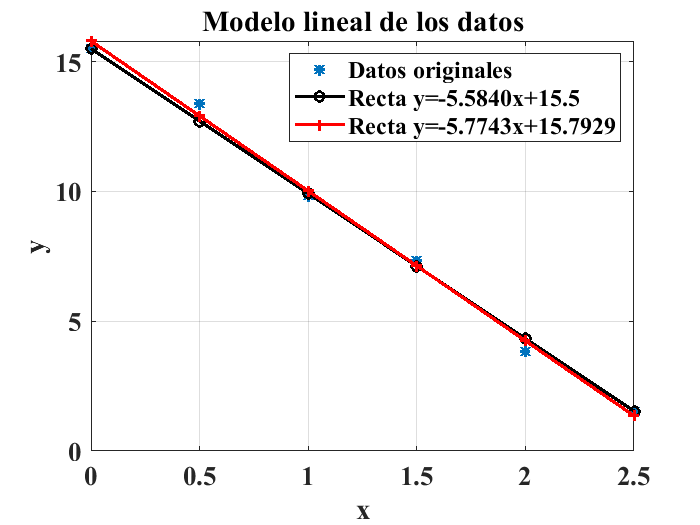

In [13]:

x=[0:0.5:2.5];
y=[15.5,13.4,9.85,7.34,3.82,1.54];
figure
plot(x,y,"*","LineWidth",2)
hold on 
plot(x,(-5.5840*x+15.5),'ko-',"LineWidth",2)
title("Modelo lineal de los datos")
hold on
plot(x,(-5.7743*x+15.7929),'r+-',"LineWidth",2)

legend("Datos originales","Recta y=-5.5840x+15.5","Recta y=-5.7743x+15.7929")
xlabel("x")
ylabel("y")
grid
set(gca,'fontsize',16);
set(gca,'fontname','Times New Roman','FontWeight','Bold');

## Regresión polinomial

Para el caso de datos con un comportamiento no lineal, es posible usar la función `polyfit()` especificando un grado diferente a 1 para aproximar una curva a los datos experimentales de la forma ({cite:t}`Moore2013`):

$$
y=a_1x^n+a_2x^{n-1}+a_3x^{n-2}+...+a_nx+a_{n+1}
$$

Por ejemplo, para los datos del ejemplo anterior, se propone un modelo cuadrático usando la instrucción `polyfit(x,y,2)`:

In [14]:
clear
close all
x=[0:0.5:2.5];
y=[15.5,13.4,9.85,7.34,3.82,1.54];
polyfit(x,y,2)

ans = 1×3 double
   -0.0557   -5.6350   15.7464

El modelo obtenido para los datos en este caso es:
$$
y= -0.0557x^2   -5.6350x  + 15.7464
$$
Una regresión de tercer grado se obtendría usando las siguientes líneas de código:

In [15]:
polyfit(x,y,3)

ans = 1×4 double
    0.5407   -2.0835   -3.7830   15.5437

Lo anterior corresponde al modelo:

$$
y= 0.5407x^3-2.0835x^2-3.7830x+15.5437
$$

Finalmente las siguientes líneas de código permiten contrastar los modelos calculados con los datos originales:

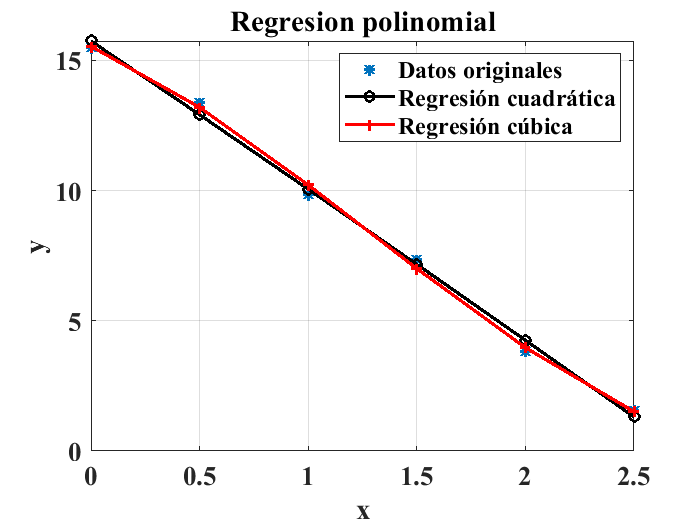

In [16]:
clear
close all
clc
%Datos originales
x=[0:0.5:2.5];
y=[15.5,13.4,9.85,7.34,3.82,1.54];
%regresión cuadrática
coef_2=polyfit(x,y,2);
%regresión de tercer grado
coef_3=polyfit(x,y,3);
figure
plot(x,y,'*',"LineWidth",2)
title("Regresion polinomial")
hold on 
plot(x,-0.0557*x.^2-5.6350*x+15.7464,'ko-',"LineWidth",2)
plot(x,0.5407*x.^3-2.0835*x.^2-3.7830*x+15.5437,'r+-',"LineWidth",2)
legend("Datos originales","Regresión cuadrática","Regresión cúbica")
xlabel("x")
ylabel("y")
grid
set(gca,'fontsize',16);
set(gca,'fontname','Times New Roman','FontWeight','Bold');

## Ejercicio de la práctica 11

1. Construya un par de arreglos $y$ y $x$ que contengan los datos de la siguiente tabla:

 | $x$ | $y$ |
  |:----|-----:|
  |$10.0$| 23.5 |
  |$20.15$| 45.4 | 
  |$30.0$|  60.05| 
  |$40.15$| 82.34| 
  |$50.0$|  110.82|
  |$60.15$|  140.54|
  |$70.0$| 167.35 |
  |$80.15$| 197.88 | 
  |$90.0$|  200.85| 
  |$100.15$|  220.34| 

a) Grafique los datos originales $x,y$.

b) Use una interpolación lineal para calcular el valor de $y$ cuado $x=16$

c) Use una interpolación cúbica para calcular el valor de $y$ cuado $x=16$

d) Use una interpolación lineal para calcular el valor de $x$ cuado $y=81$

e) Use una interpolación cúbica para calcular el valor de $x$ cuado $y=81$  

f) Use una interpolación del tipo spline para aproximar los valores de $y$ para aquellos valores de $x$ en el intervalo $[10,100]$ con un incremento de 2.

g) Haga una gráfica de los datos originales y los obtenidos con la interpolación del ejercicio 6. Use etiquetas, colores, tipos de línea y rótulos para una correcta interpretación de la gráfica.

2. Construya un par de arreglos $y$ y $x$ que contengan los datos de la siguiente tabla:

  | $x$| $y$ |
  |:---|----:|
  |$10$| 33.51|
  |$20$| 55.42| 
  |$30$| 70.15| 
  |$40$| 92.34| 
  |$50$| 120.82|
  |$60$| 150.54|
  |$70$| 177.35|
  |$80$| 197.88| 
  |$90$| 209.85| 
  |$100$|230.34| 

a) Use la función `polyfit()` para realizar una regresión lineal de los datos. Escriba la ecuación del modelo obtenido.

b) Haga una gráfica para comparar los datos originales con el modelo obtenido en el punto a).

c) Use la función `polyfit()` para realizar una regresión cuadrática de los datos. Escriba la ecuación del modelo obtenido.

d) Haga una gráfica para comparar los datos originales con el modelo obtenido en el punto c).

Use etiquetas, colores, tipos de línea y rótulos para una correcta interpretación de las gráficas.